# Introducing emergency demand and its modelling

In this notebook we

- Explain what is meant by 'emergency demand for beds'?
- Introduce why this is important for hospitals 
- Evaluate what a model needs to produce to be useful to bed managers 
- Explain design choices that we made in order to produce a useful model 
- Show an example of the output that we send at UCLH
- Outline the other notebooks (which are work in progress) that will enable you to step through the modelling process

## What is 'emergency demand for beds'?

There are two ways people are admitted to hospital: 

- planned (or elective) admissions 
- emergency admissions, typically through the Accident & Emergency Department, which is referred to by hospitals as the ED (Emergency Department). Some patients are admitted after visiting Same Day Emergency Care (SDEC). Here, we refer to the combined ED and SDEC as the ED, since this what UK hospitals typically refer to. 

Emergencies are, by definition, unplanned. Most people are discharged after visiting the ED or SDEC, but about 10% are admitted to an emergency bed. This is referred to as 'emergency demand for beds'

## Why is modelling emergency demand for beds important?

Hospitals find it useful to predict how many beds they need on a given day because:
- they must make sure they do not admit more people than they can safely care for. If they think they can no longer provide safe care, they take measures like diverting ambulances to other hospitals or cancelling planned procedures
- this planning has to take account of emergency patients who have not arrived yet as well as those currently in the ED or SDEC who will need admission
- knowing levels of demand helps plan for best use of resources like staffing
- if they know which specialties are in demand, they can take steps to discharge more patients from those areas

The demand for emergency beds varies 
- by time of day, day of week and season
- in terms of the acuity of the patients - how sick they are
- in terms of which specialty they need to be admitted to - medical, surgical, paediatric etc

Hospitals typically predict emergency demand using simple heuristics eg taking yesterday's emergency bed numbers and assuming today will be the same.

However, now that hospitals have Electronic Health Records (EHRs) patient records, they could do more with real-time data. Typically, bed planners know about new demand only when a staff member in the ED creates a bed request for an incoming patients. By that time, the patient may have been in the ED for hours. Real-time data means that bed planners could be notified much earlier


## What modelling is useful to bed managers? 

*The requirements for a good model for bed planners*

- **Issues predictions at the times of day they need them:**
  Our users have a routine where they prepare a situation report of hospital capacity five times each day. They wanted predictions to be available to them in the preparation of that report. 

- **Produces output at aggregate level rather than individual:**
  It is quite common for researchers using statistics or Machine Learning to produce models that predict each patient's probability of admission. However, this is not useful for bed managers because, when managing capacity, they are less interested in whether any particular patient will be admitted, than they are in overall numbers of beds needed

- **Produces output based on real-time data from the Electronic Health Record (EHR):**
  Real-time data is not necessary for predictive models; they can be trained on historical datasets, and then used to make predictions about the numbers of patients to expect today. However, if a hospital is able to feed real-time data about patients into a model, bed managers will have a better sense of today's demand, rather than that of a statistically probable day

- **Provides some quantification of the level of certainty of its estimates:**
  Simple heuristics can provide a predicted number of beds as a single number. This doesn't show how likely that outcome is compared to others. A predictive model, being based in probability theory, can provide a sense of uncertainty around the suggested number of beds. A probability distribution shows all possible outcomes and how likely each one is. Ironically, knowing the spread of the uncertainty gives a more certain picture

- **Takes account of patients who are yet to arrive:**
  A picture comprising only patients currently in the hospital is incomplete. When thinking in the morning about demand and capacity over the whole day, models need to take account of later arrivals to the ED who will need admission, as well as later departures who will vacate beds. The arrivals will show up within a prediction window after the prediction time (say 8 hours) and they will have some probability of being admitted from ED to a ward before the end of that prediction window. That probability depends on how well the ED is performing against its targets of seeing 76% of patients within 4 hours

- **Has a breakdown of demand by specialty and sex:**
  Predictions of capacity at the level of the whole hospital are somewhat useful, but not actionable. Only once you know how many specific types of beds are needed can you take action. For example, bed managers might decide to reconfigure a bay (a set of four beds with allocated staff) on a ward from male to female, or ask clinicians in one of the clinical specialties to discharge patients earlier, because that specialty is likely to be under pressure in the next 8 hours 

- **Excludes patients who already have bed requests:**
  The EHR shows a list of patients in ED who already have bed requests. This is a known source of demand, that does not need predictions. A useful model shows numbers in addition to these, including both patients in ED who don't have bed requests yet, and people yet to arrive


## Decision choices made in order to create a useful model 

Based on the requirements above, we made the following decisions about what to present to our users. 

- Train the models such that they are tailored to the times of day at which the bed managers issue their situation reports
- Show output at aggregate level rather than individual 
- Differentiate between patients with and without a decision to admit 
- Provide separate predictions for patients in the ED and SDEC now, and those yet to arrive
- Break down the output by speciality, and by sex
- For the yet to arrive, assume that the time it takes to admit them is achieved by the ED within the target time of 4 hours for a specified percentage of patients (currenly UK targets are 76%)
- Give some sense of uncertainty in the predictions (but, because bed managers are not that interested in seeing whole probability distributions, keep this minimal)


The annotated figure below shows the output that our application currently generates at UCLH. We chose to send the output in the form of a spreadsheet, as this is the format most convenient to our users. 

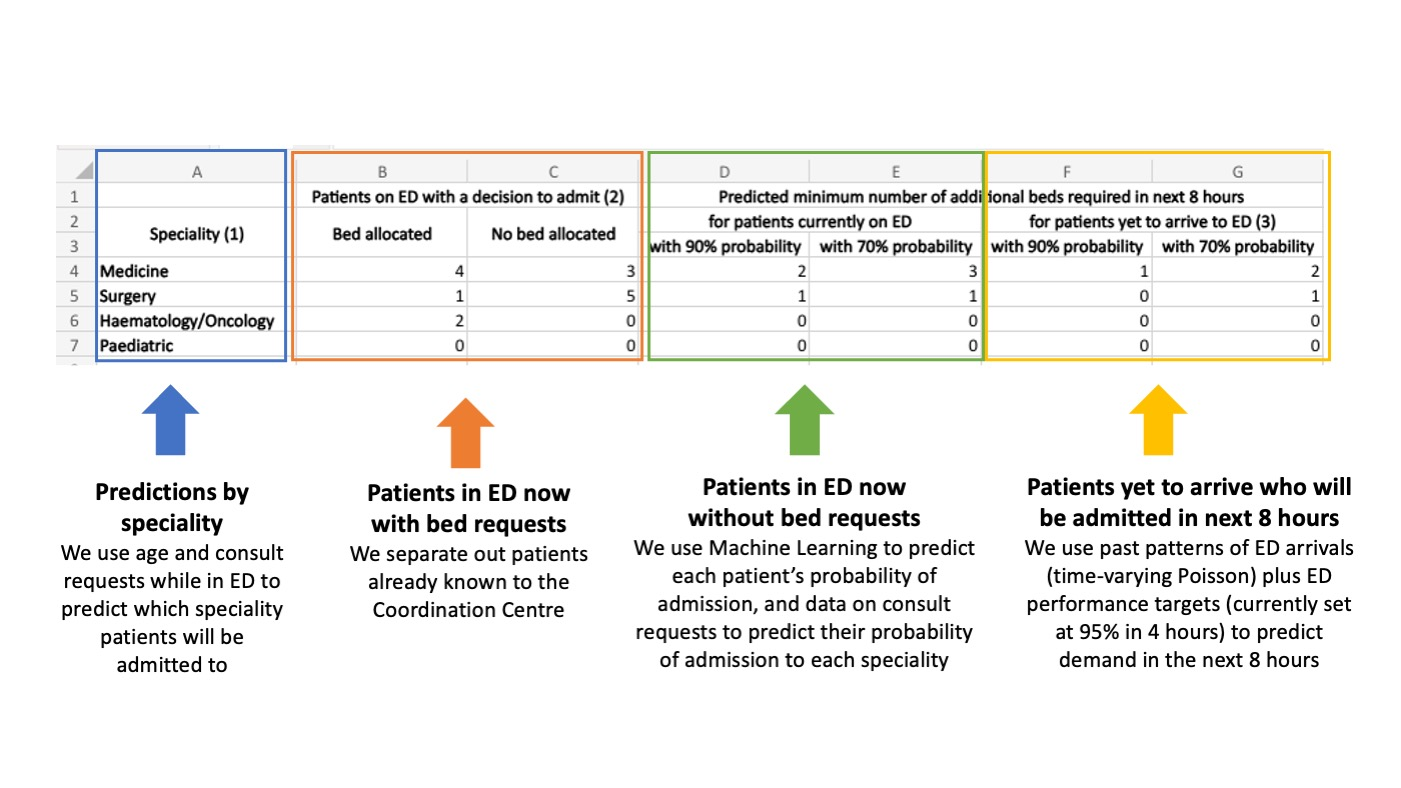

In [2]:
from IPython.display import Image
Image(filename='img/UCLH application with annotation.jpg')

This output

- Is sent at five times per day, to coincide with the preparation of the situation reports
- Shows aggregate level rather than individual predictions
- Differentiates between patients with a decision to admit (columns B:C) and those without (columns D:G)
- Provides separate predictions for patients in the ED and SDEC now (columns D:E), and those yet to arrive (columns F:G)
- Breaks down the output by speciality (rows 4:7); a forthcoming version will break down by sex
- For the yet to arrive, assumes that the time it takes to admit them is achieved by the ED within the target time of 4 hours for a specified percentage of patients (currenly UK targets are 76% but we are using the former target of 95% currently)
- Gives some sense of uncertainty in the predictions but showing the minimum number of beds needed with 90% probability (columns D and F) and with 70% probability (columns E and G)

The remaining notebooks will break down each step showing how this has been done. 
